## 1. Import the libraries and prepare dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('wine.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Standardize dataset
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 2. Apply LDA to reduce dimensions

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2, store_covariance=True)
x_lda_train = lda.fit_transform(x_train, y_train)
x_lda_test = lda.transform(x_test)

In [44]:
print('Total classes J: ', x_train.shape[1], ', New classes K: ', len(lda.classes_))
print('New classes K intercept: ', lda.intercept_, '\n')
print('New classes K weights:\n', pd.DataFrame(lda.coef_), '\n')
print('Distribution Mean (per class J for each K):\n', pd.DataFrame(lda.means_), '\n')
print('Distribution Mean (per class J):\n', pd.DataFrame(lda.xbar_), '\n')
print('Co-variance (within-class):\n', pd.DataFrame(lda.covariance_), '\n')

Total classes J:  13 , New classes K:  3
New classes K intercept:  [-10.77460385  -4.05606805 -12.30592102] 

New classes K weights:
          0         1         2         3         4         5          6   \
0  2.025721 -0.116660  1.354590 -2.879013 -0.025676 -2.756109   8.662596   
1 -1.525487 -1.060478 -1.502553  1.268597  0.003197  0.223029   0.623886   
2 -0.172754  1.513714  0.516283  1.423399  0.023324  2.660912 -10.098347   

         7         8         9         10        11        12  
0  0.935306 -1.322727 -1.583959  0.022055  4.121280  5.164327  
1  0.191916  0.759674 -1.537365  0.818725  0.112846 -2.220740  
2 -1.253432  0.422397  3.710315 -1.095771 -4.563431 -2.625096   

Distribution Mean (per class J for each K):
          0         1         2         3         4         5         6   \
0  0.919784 -0.307458  0.311705 -0.770701  0.357067  0.942440  1.081270   
1 -0.894191 -0.418027 -0.467486  0.221436 -0.292578 -0.074764  0.031344   
2  0.185482  0.876835  0.278214  

## 3. Training the Logistic Regression model on the Training set

In [4]:
from sklearn.linear_model import LogisticRegression

model_lda = LogisticRegression(random_state=0)
model_lda.fit(x_lda_train, y_train)

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

## 4a. Making the Confusion Matrix

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score

def predict(y_pred, subtitle):
    cm = confusion_matrix(y_test, y_pred)
    print(f'Accuracy score ({subtitle}) : ', accuracy_score(y_test, y_pred))
    print(pd.DataFrame(cm), '\n')

predict(model_lda.predict(x_lda_test), 'w LDA')
predict(model.predict(x_test), 'w/o LDA')

Accuracy score (w LDA) :  1.0
    0   1  2
0  14   0  0
1   0  16  0
2   0   0  6 

Accuracy score (w/o LDA) :  1.0
    0   1  2
0  14   0  0
1   0  16  0
2   0   0  6 



## 5b. Visualising the results (LDA)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


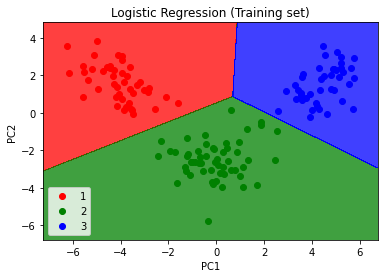

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


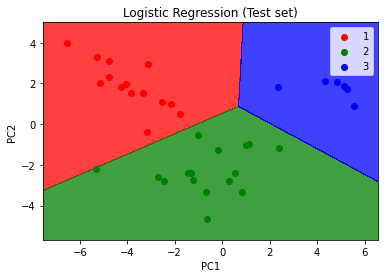

In [6]:
from matplotlib.colors import ListedColormap

def display_graph(x_set, y_set, set_type):
    x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

    plt.contourf(x1, x2, model_lda.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=j)

    plt.title(f'Logistic Regression ({set_type})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()
    
display_graph(x_lda_train, y_train, 'Training set')
display_graph(x_lda_test, y_test, 'Test set')
